Vary DNA concentration together include GFP DNA concentration

In [1]:
import sys,os
sys.path.append(os.path.realpath('..'))

from scripts.functions import dilute, replenish,dilute_species, replenish_species, run_model,plot_result,plot_result_two_state
from scripts.species import DNA, RNA, Protein, Resource
from scripts.models import Repressor_model_HC,Repressor_model
from bokeh.io import export_png


import numpy as np
import scipy.integrate
import scipy.optimize
from bokeh.plotting import figure, output_file, show
import bokeh.plotting
import bokeh.io
from bokeh.models import Span


# We will use Matplotlib to make a 3D plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import panel as pn
pn.extension()

bokeh.io.output_notebook()

Loading BokehJS ...

In [2]:

def Repressor_model_HC(molecules,t,alpha,beta,K,HC,Kr,KTL,KTX,lamb1,lamb2):
    T7_DNA,T7_RNA,T7,GFP_DNA,GFP_RNA,GFP,Repressor_DNA,Repressor_RNA,Repressor,R = molecules
    TX = 1
    TL = 1
    return np.array(
        [
            0,
            alpha*TX*T7_DNA*T7*R/(R+K)*(Kr/(Repressor**HC+Kr)),
            beta*TL*T7_RNA*(R/(R+K)),
            0,
            alpha*TX*GFP_DNA*T7*R/(R+K),
            beta*TL*GFP_RNA*R/(R+K),
            0,
            alpha*TX*Repressor_DNA*T7*R/(R+K),
            beta*TL*Repressor_RNA*R/(R+K),
            -alpha*TX*T7_DNA*T7*R/(R+K)-alpha*TX*GFP_DNA*T7*R/(R+K)-alpha*TX*Repressor_DNA*T7*R/(R+K)-beta*TL*T7_RNA*R/(R+K)-beta*TL*GFP_RNA*R/(R+K)-beta*TL*Repressor_RNA*R/(R+K),
        ]
    )
    

In [3]:
#######Define species #######

#T7 RNAP
T7_DNA = DNA()
T7_RNA = RNA()
T7 = Protein()

#Repressor
Repressor_DNA = DNA()
Repressor_RNA = RNA()
Repressor = Protein()

#GFP
GFP_DNA = DNA()
GFP_RNA = RNA()
GFP = Protein()

#Resource
R      = Resource()

#Others
TX = 1
TL = 1

#list of molecules
molecules_list = [T7_DNA,T7_RNA,T7,GFP_DNA,GFP_RNA,GFP,Repressor_DNA,Repressor_RNA,Repressor,R]


#give index num
for i in range(0,len(molecules_list)):
    molecules_list[i].idx = i




#define values 
##T7
T7_DNA.ic =0.01
T7_DNA.lc =0.01

T7.ic = 1
T7.lc = 1

##GFP
GFP_DNA.ic = 2
GFP_DNA.lc = 2

GFP.lc = 0

##Repressor 
Repressor_DNA.ic = 0.01
Repressor_DNA.lc = 0.01


#resources
R.ic =100
R.lc =100

#Define parameters
alpha=0.7;
beta=0.07;
K=1.0;
Kr = 2;
HC = 2;
KTL=10;
KTX=1;
lamb1=0;
lamb2=0;

parameters_list = (alpha,beta,K,HC,Kr,KTL,KTX,lamb1,lamb2)

end_time = 30

end_cycle = end_time*4+1


In [5]:
#Define parameters
alpha=0.7;
beta=0.07;
K= 1.0;
Kr = 1;
HC = 1;
KTL=10;
KTX=1;
lamb1=0;
lamb2=0;

parameters_list = (alpha,beta,K,HC,Kr,KTL,KTX,lamb1,lamb2)

end_time = 30

end_cycle = end_time*4+1

steadystate_data = []
heatmap_data = []
screening_condition = []
conc = np.logspace(-4,1, 100, endpoint=True)


for conc in np.logspace(-4,1, 100, endpoint=True):
    print(conc)
    #experiment 
    T7_DNA.ic = conc
    T7_DNA.lc = conc
    Repressor_DNA.ic = conc
    Repressor_DNA.lc = conc
    GFP_DNA.ic = 2
    GFP_DNA.lc = 2
    #initial value
    molecules_0 = [None]*len(molecules_list) #create empty list

    for i in range(0,len(molecules_list)):
        molecules_0[i] = molecules_list[i].ic

    #stage 1 kick start
    result_all=[molecules_0] #initial condition


    #DR = 0.2

    #kick start
    dilution_list = [T7_RNA,T7,GFP,GFP_RNA,Repressor,Repressor_RNA,R]
    replenish_list = [T7,R]
    result_all,molecules_0 = run_model(Repressor_model_HC,(0,4),parameters_list,molecules_0,dilution_list,replenish_list,result_all)


    #self regeneration 
    dilution_list = [T7_RNA,T7,GFP,GFP_RNA,Repressor,Repressor_RNA,R]
    replenish_list = [R]
    result_all,molecules_0 = run_model(Repressor_model_HC,(4,30),parameters_list,molecules_0,dilution_list,replenish_list,result_all)


    result_all = np.resize(result_all,(end_cycle,10))
    for i in range(0,len(molecules_list)):
            (molecules_list[i]).result = result_all.transpose()[i]

    #T7_DNA,T7_RNA,T7,GFP_DNA,GFP_RNA,GFP,R = result_all.transpose()
    #plot_result_two_state(GFP.result)
    #print((GFP).result[60]/GFP.pc_result[60])
    steadystate_data.append((GFP).result[100])

screening_condition.append(condition)
heatmap_data.append(steadystate_data)


0.0001
0.00011233240329780277
0.0001261856883066021
0.00014174741629268049
0.00015922827933410923
0.0001788649529057435
0.00020092330025650479
0.0002257019719633919
0.00025353644939701115
0.0002848035868435802
0.00031992671377973844
0.00035938136638046257
0.0004037017258596554
0.00045348785081285824
0.000509413801481638
0.0005722367659350221
0.0006428073117284319
0.0007220809018385464
0.0008111308307896872
0.0009111627561154887
0.001023531021899027
0.0011497569953977356
0.001291549665014884
0.0014508287784959402
0.0016297508346206436
0.0018307382802953678
0.0020565123083486517
0.002310129700083158
0.002595024211399737
0.002915053062825176
0.0032745491628777285
0.0036783797718286343
0.004132012400115334
0.004641588833612782
0.005214008287999685
0.005857020818056668
0.006579332246575682
0.007390722033525776
0.008302175681319744
0.0093260334688322
0.010476157527896652
0.011768119524349979
0.013219411484660288
0.01484968262254465
0.016681005372000592
0.01873817422860383
0.0210490414451202


TypeError: list.append() takes exactly one argument (2 given)

In [17]:
#Define parameters
alpha=0.7;
beta=0.07;
K= 1.0;
Kr = 2;
HC = 2;
KTL=10;
KTX=1;
lamb1=0;
lamb2=0;

parameters_list = (alpha,beta,K,HC,Kr,KTL,KTX,lamb1,lamb2)

end_time = 30

end_cycle = end_time*4+1

steadystate_data = []
heatmap_data = []
screening_condition = []
conc = np.logspace(-4,1, 100, endpoint=True)

for condition in np.linspace(0,10, 10, endpoint=True):
    for conc in np.logspace(-4,1, 100, endpoint=True):
        print(conc)
        #experiment 
        T7_DNA.ic = conc
        T7_DNA.lc = conc
        Repressor_DNA.ic = condition
        Repressor_DNA.lc = condition
        GFP_DNA.ic = 2
        GFP_DNA.lc = 2
        #initial value
        molecules_0 = [None]*len(molecules_list) #create empty list

        for i in range(0,len(molecules_list)):
            molecules_0[i] = molecules_list[i].ic

        #stage 1 kick start
        result_all=[molecules_0] #initial condition


        #DR = 0.2

        #kick start
        dilution_list = [T7_RNA,T7,GFP,GFP_RNA,Repressor,Repressor_RNA,R]
        replenish_list = [T7,R]
        result_all,molecules_0 = run_model(Repressor_model_HC,(0,4),parameters_list,molecules_0,dilution_list,replenish_list,result_all)


        #self regeneration 
        dilution_list = [T7_RNA,T7,GFP,GFP_RNA,Repressor,Repressor_RNA,R]
        replenish_list = [R]
        result_all,molecules_0 = run_model(Repressor_model_HC,(4,30),parameters_list,molecules_0,dilution_list,replenish_list,result_all)


        result_all = np.resize(result_all,(end_cycle,10))
        for i in range(0,len(molecules_list)):
                (molecules_list[i]).result = result_all.transpose()[i]

        #T7_DNA,T7_RNA,T7,GFP_DNA,GFP_RNA,GFP,R = result_all.transpose()
        #plot_result_two_state(GFP.result)
        #print((GFP).result[60]/GFP.pc_result[60])
        steadystate_data.append((GFP).result[100])

    screening_condition.append(condition)
    heatmap_data.append(steadystate_data)


0.0001
0.00011233240329780277
0.0001261856883066021
0.00014174741629268049
0.00015922827933410923
0.0001788649529057435
0.00020092330025650479
0.0002257019719633919
0.00025353644939701115
0.0002848035868435802
0.00031992671377973844
0.00035938136638046257
0.0004037017258596554
0.00045348785081285824
0.000509413801481638
0.0005722367659350221
0.0006428073117284319
0.0007220809018385464
0.0008111308307896872
0.0009111627561154887
0.001023531021899027
0.0011497569953977356
0.001291549665014884
0.0014508287784959402
0.0016297508346206436
0.0018307382802953678
0.0020565123083486517
0.002310129700083158
0.002595024211399737
0.002915053062825176
0.0032745491628777285
0.0036783797718286343
0.004132012400115334
0.004641588833612782
0.005214008287999685
0.005857020818056668
0.006579332246575682
0.007390722033525776
0.008302175681319744
0.0093260334688322
0.010476157527896652
0.011768119524349979
0.013219411484660288
0.01484968262254465
0.016681005372000592
0.01873817422860383
0.0210490414451202


<AxesSubplot:>

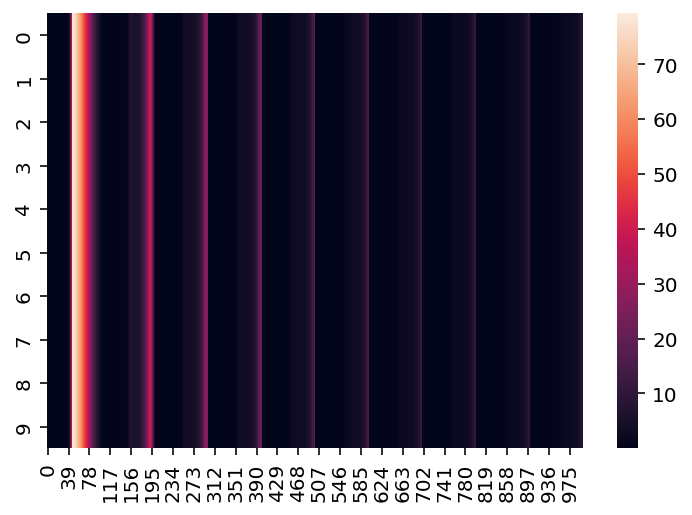

In [21]:
import seaborn as sns
sns.heatmap(np.array(heatmap_data))

In [27]:
np.shape(np.array(heatmap_data))

(10, 1000)

In [7]:
conc = np.logspace(-4,1, 100, endpoint=True)

p = figure(width=800, height=400,x_axis_type = "log")
p.dot(conc,stored_data,size=20)
p.xaxis.axis_label = 'DNA concentration'
p.yaxis.axis_label = 'Concentration'

show(p)
#export_png(p, filename="plot.png")


Solving environment: / 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/noarch::conda-pack==0.6.0=pyhd3eb1b0_0
  - defaults/noarch::holoviews==1.14.8=pyhd3eb1b0_0
  - defaults/osx-64::anaconda-navigator==2.2.0=py39hecd8cb5_0
  - defaults/osx-64::notebook==6.4.8=py39hecd8cb5_0
  - defaults/noarch::smart_open==5.1.0=pyhd3eb1b0_0
  - defaults/osx-64::astroid==2.6.6=py39hecd8cb5_0
  - defaults/noarch::nbclassic==0.3.5=pyhd3eb1b0_0
  - defaults/osx-64::jupyter==1.0.0=py39hecd8cb5_7
  - defaults/noarch::cookiecutter==1.7.3=pyhd3eb1b0_0
  - defaults/noarch::python-lsp-black==1.0.0=pyhd3eb1b0_0
  - defaults/noarch::dask==2022.2.1=pyhd3eb1b0_0
  - defaults/noarch::google-cloud-core==1.7.1=pyhd3eb1b0_0
  - defaults/osx-64::anaconda==2022.05=py39_0
  - defaults/osx-64::conda==4.13.0=py39hecd8cb5_0
  - defaults/noarch::datashader==0.13.0=pyhd3eb1b0_1
  - defaults/noarch::conda-repo-cli==1.0.4=pyhd3eb1b0_0
